# Univariet Imputation

***Univariet Imputation is a process of handling missing values in a single column or feature. It imputes the missing values in the column based on the data in that column only*.**

we can implement univarient Imputation in both :
* Numerical Features
* Categorical Features

# Numerical Imputation

***Univariet Numerical Imputation means handling missing values in numeirc column***.

we can fill using: 
1. Mean/Medain Imputation
2. Arbitary Value Imputation
3. End of Distribution Imputation

In [158]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [159]:
df = pd.read_csv('titanic_toy.csv')

df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [160]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

## 1. Mean/Median Imputation

***Mean/Median Imputation is nothing but filling missing values with mean or median of the specific column.***

**When to use** :
* when there is less than 5% of missing values in the column.
* Also, when data is 'missing completely at random' (MCAR)

**Advantages**:
* Easy to implement (we can implement by pandas fillna() or sklearn.impute SimpleImputer)

**Disadvantages**:
* It changes the Distribution.
* Increases the count of outliers.
* Correlation with other columns will change.

### Mean Imputation

In [161]:
from sklearn.impute import SimpleImputer

In [162]:
# Craeting object for mean imputer
mean_imputer = SimpleImputer(strategy = 'mean')

In [163]:
# applying mean imputer
df['Age_Mean'] = mean_imputer.fit_transform(df[['Age']])
df['Fare_Mean'] = mean_imputer.fit_transform(df[['Age']])

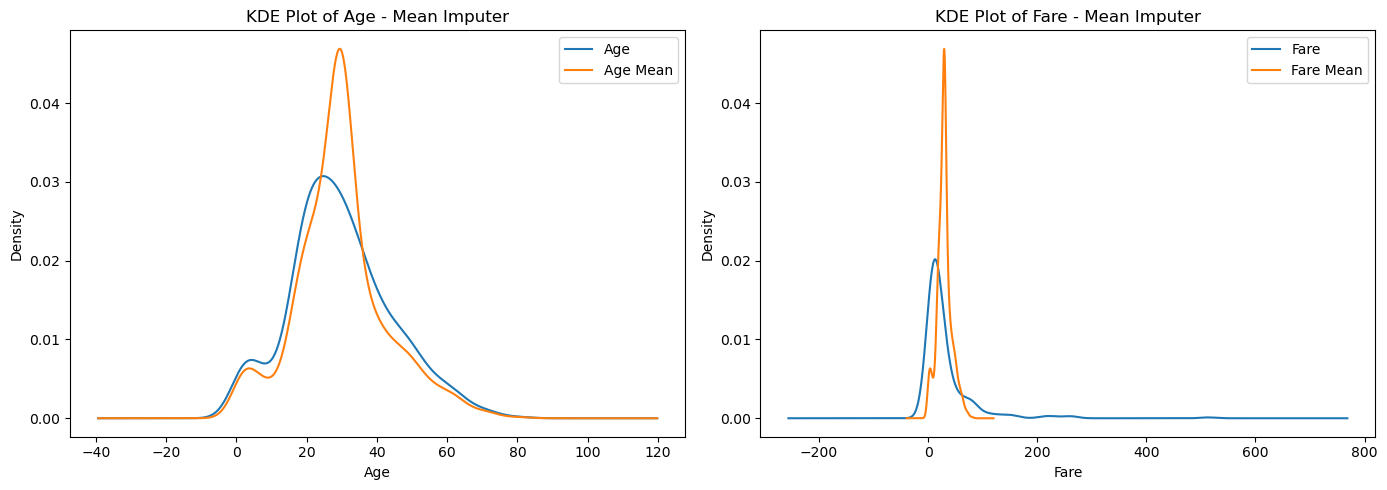

In [164]:
# Kde for before and after mean imputation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))


df['Age'].plot(kind='kde', label='Age', ax=ax1)
df['Age_Mean'].plot(kind='kde', label='Age Mean', ax=ax1)
ax1.set_title('KDE Plot of Age - Mean Imputer')
ax1.set_xlabel('Age')
ax1.set_ylabel('Density')
ax1.legend()

df['Fare'].plot(kind='kde', label='Fare', ax=ax2)
df['Fare_Mean'].plot(kind='kde', label='Fare Mean', ax=ax2)
ax2.set_title('KDE Plot of Fare - Mean Imputer')
ax2.set_xlabel('Fare')
ax2.set_ylabel('Density')
ax2.legend()

plt.tight_layout()

plt.show()

### Median Imputer

In [165]:
# Creating object for median imputer
median_imputer = SimpleImputer(strategy = 'median')

In [166]:
# applying median imputer
df['Age_Median'] = median_imputer.fit_transform(df[['Age']])
df['Fare_Median'] = median_imputer.fit_transform(df[['Fare']])

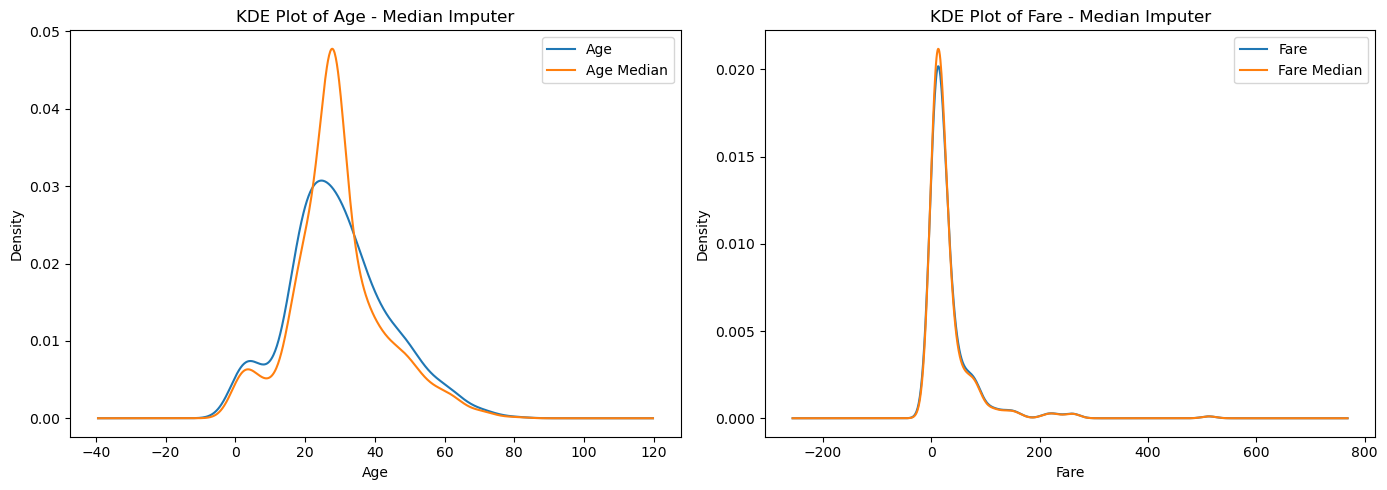

In [167]:
# kde plot for before and after median imputation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))


df['Age'].plot(kind='kde', label='Age', ax=ax1)
df['Age_Median'].plot(kind='kde', label='Age Median', ax=ax1)
ax1.set_title('KDE Plot of Age - Median Imputer')
ax1.set_xlabel('Age')
ax1.set_ylabel('Density')
ax1.legend()

df['Fare'].plot(kind='kde', label='Fare', ax=ax2)
df['Fare_Median'].plot(kind='kde', label='Fare Median', ax=ax2)
ax2.set_title('KDE Plot of Fare - Median Imputer')
ax2.set_xlabel('Fare')
ax2.set_ylabel('Density')
ax2.legend()

plt.tight_layout()

plt.show()

## 2. Arbitary Value Imputation

***Arbitary Value Imputation is nothing but filling missing values with any constant value. In this taking constant values so important based on the data in the column***.

**When to use** :
* when there is less than 5% of missing values in the column.
* Also, when data is 'missing completely at random' (MCAR)

**Advantages**:
* Easy to implement (we can implement by pandas fillna() or sklearn.impute SimpleImputer)

**Disadvantages**:
* It changes the Distribution.
* Increases the count of outliers.
* Correlation with other columns will change.

In [168]:
from sklearn.impute import SimpleImputer

In [169]:
# Maximum and minimum values in the columns
print(f'Max Age: {max(df['Age'])} , Min Age: {min(df['Age'])}')
print(f'Max Fare: {max(df['Fare'])} , Min Fare: {min(df['Fare'])}')

Max Age: 80.0 , Min Age: 0.42
Max Fare: 512.3292 , Min Fare: 0.0


In [170]:
# Creating object for arbitary imputation
arbitary_imputer = SimpleImputer(strategy = 'constant',fill_value = 99)

In [171]:
# applying arbitary imputation
df['Age_Arbitary'] = arbitary_imputer.fit_transform(df[['Age']])
df['Fare_Arbitary'] = arbitary_imputer.fit_transform(df[['Fare']])

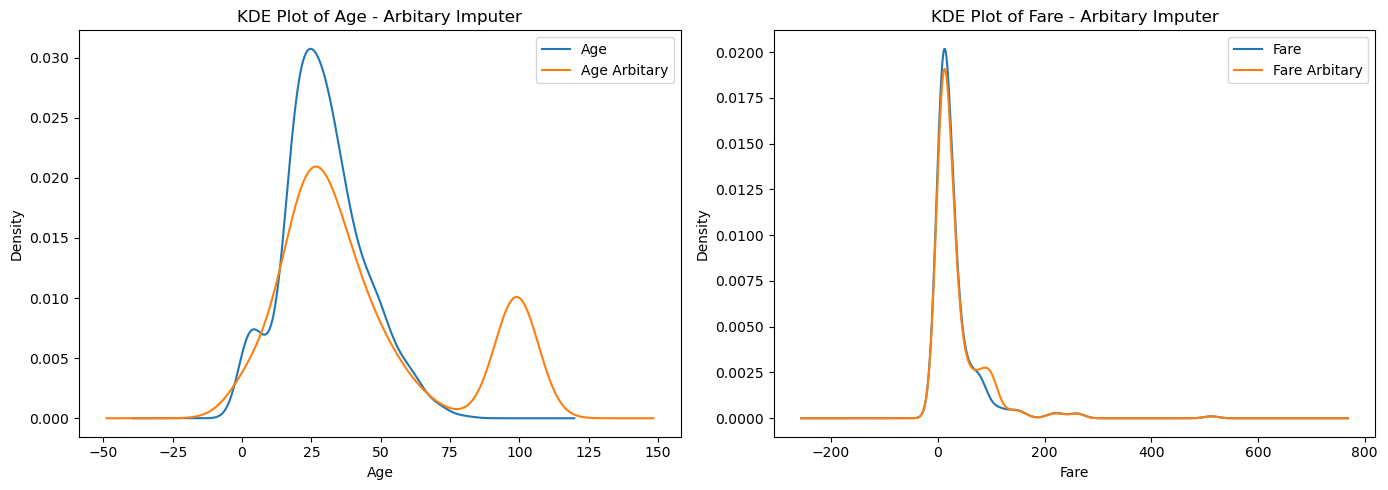

In [172]:
# kde for before and after arbitary imputation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))


df['Age'].plot(kind='kde', label='Age', ax=ax1)
df['Age_Arbitary'].plot(kind='kde', label='Age Arbitary', ax=ax1)
ax1.set_title('KDE Plot of Age - Arbitary Imputer')
ax1.set_xlabel('Age')
ax1.set_ylabel('Density')
ax1.legend()

df['Fare'].plot(kind='kde', label='Fare', ax=ax2)
df['Fare_Arbitary'].plot(kind='kde', label='Fare Arbitary', ax=ax2)
ax2.set_title('KDE Plot of Fare - Arbitary Imputer')
ax2.set_xlabel('Fare')
ax2.set_ylabel('Density')
ax2.legend()

plt.tight_layout()

plt.show()

## 3. End of Distribution Imputation

***End of the distribution is used when we want to impute missing values with quartile ranges.***

**when we use**:
* when there is less than 5% of missing values in the column.
* If data is normal -> we can apply  **mean+3*variance** or **mean-3*variance**.
* Id data is skewed -> we can apply **Q1-1.5*IQR** or **Q3+1.5*IQR**.

**Advantages**:
* Outliers will reduce.

**Disadavantges**:
* It is hard to calculate the quartile ranges and them implement.
* It changes correlations with other columns.

We can implement using SimpleImputer() and putting startegy as constant and fill_values as the calculated values from the formulas above.

# categorical Imputation

***Univariet Catgroical Imputation is process of filling missing values in the Categorical columns.***

we can fill using : 
1. Most frequent or mode Imputation
2. Missing category Imputation

In [173]:
data = {
    'day' : np.arange(1,1001),
    'weather_type' : np.random.choice(['cloudy','sunny','rainy','cool','windy',np.nan,'cloudy'],1000)
}

weather = pd.DataFrame(data) 

weather['weather_type'] = weather['weather_type'].replace('nan', np.nan)

In [174]:
weather.head()

,day,weather_type
0,1,cool
1,2,cloudy
2,3,windy
3,4,cloudy
4,5,rainy


In [175]:
weather.isnull().mean()*100

day              0.0
weather_type    13.3
dtype: float64

## 1. Mode Imputation or Most frequent Imputation

***Mode Imputation is nothing but filling the missing values in the column with most frequently occured category in the column.***

**when to use:**
* we use whe there is less than 5% of data is missing in the column.
* We use when one of the category is dominanting the most.

In [176]:
from sklearn.impute import SimpleImputer

In [177]:
# Checking categories count
weather_counts = weather['weather_type'].value_counts()
weather_counts

weather_type
cloudy    282
cool      149
rainy     148
windy     147
sunny     141
Name: count, dtype: int64

<Axes: xlabel='weather_type'>

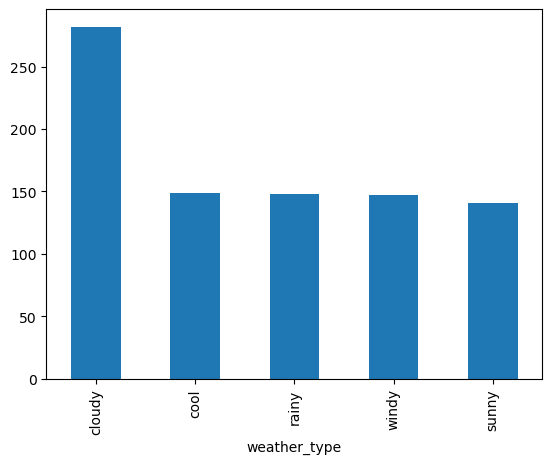

In [178]:
# bar plot of categories count
weather_counts.plot(kind = 'bar')

In [179]:
# Creatng object for mode imputer
mode_imputer = SimpleImputer(strategy = 'most_frequent')

In [180]:
# applying mode imputer
weather['weather_type_mode'] = mode_imputer.fit_transform(weather[['weather_type']]).ravel()

<Axes: xlabel='weather_type_mode'>

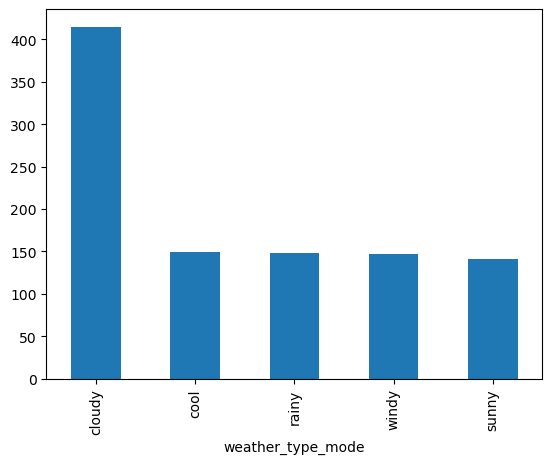

In [181]:
# bar plot after mode imputer
weather['weather_type_mode'].value_counts().plot(kind = 'bar')

## 2. Missing category Imputation

***Missing category Imputation is nothing but filling the missing values in the column with new category called 'missing'***.

In [182]:
from sklearn.impute import SimpleImputer

In [183]:
# Craeting object for category imputer
category_imputer = SimpleImputer(strategy = 'constant', fill_value = 'missing')

In [184]:
# applying category imputer
weather['weather_type_missing'] = category_imputer.fit_transform(weather[['weather_type']]).ravel()

<Axes: xlabel='weather_type_missing'>

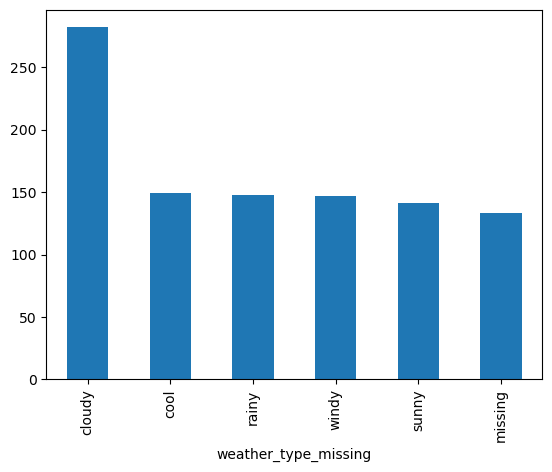

In [185]:
# bar plot after category imputer
weather['weather_type_missing'].value_counts().plot(kind = 'bar')